<a href="https://colab.research.google.com/github/SageevanPRajah/DL-Lab-1/blob/main/DL_LabSheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Lab Sheet-1**

# 1.1. Task-1

In [1]:
import numpy as np

In [2]:
np.random.exponential(scale=1.0, size=(4, 4))

array([[0.67398853, 2.15513916, 0.20084256, 0.40938247],
       [0.57175899, 0.20065475, 0.32748453, 1.943693  ],
       [1.55563956, 1.0560975 , 0.53862631, 0.61424415],
       [0.13240487, 1.17468131, 0.49671836, 3.33483671]])

In [3]:
import matplotlib.pyplot as plt

In [4]:
exp_data = np.random.exponential(scale=1.0, size=100000)
uniform_data = np.random.rand(100000)
normal_data = np.random.randn(100000)

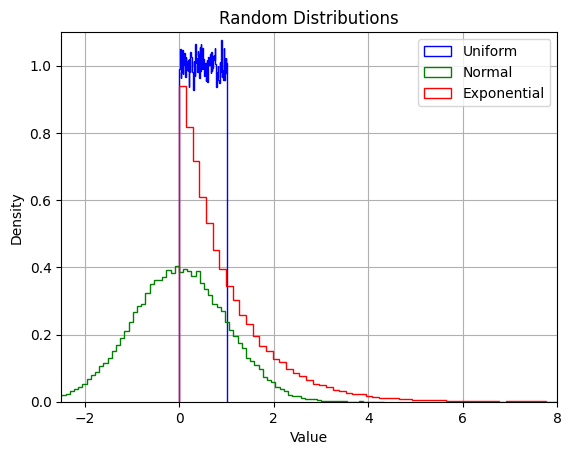

In [5]:
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="Uniform")
plt.hist(normal_data, density=True, bins=100, histtype="step", color="green", label="Normal")
plt.hist(exp_data, density=True, bins=100, histtype="step", color="red", label="Exponential")

plt.axis([-2.5, 8, 0, 1.1])
plt.legend(loc="upper right")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

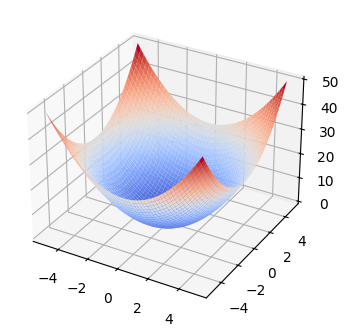

In [7]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

figure = plt.figure(1, figsize=(12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)

plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv("Pokemon.csv", index_col=0, encoding="latin")

In [10]:
stat_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats = df[stat_cols].copy()

In [11]:
pearson_corr  = stats.corr(method="pearson")
spearman_corr = stats.corr(method="spearman")

In [12]:
sns.set(context="notebook", style="white")
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

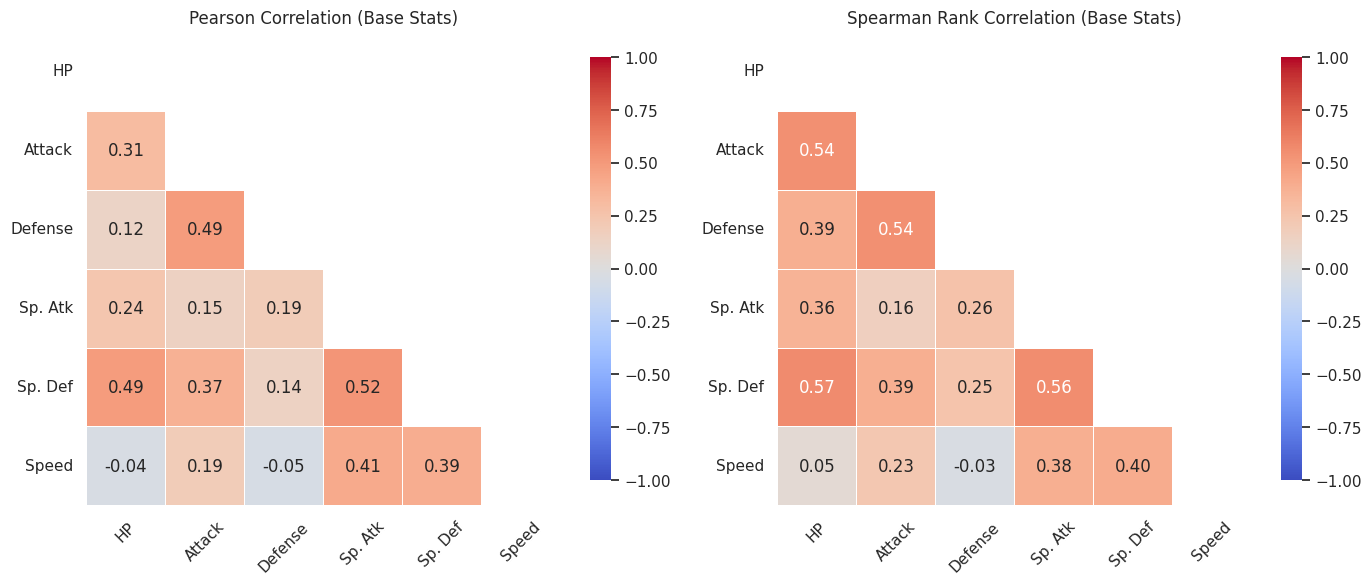

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson
sns.heatmap(
    pearson_corr, mask=mask, ax=axes[0],
    annot=True, fmt=".2f", vmin=-1, vmax=1, center=0,
    cmap="coolwarm", square=True, linewidths=.5, cbar_kws={"shrink": .8}
)
axes[0].set_title("Pearson Correlation (Base Stats)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Spearman
sns.heatmap(
    spearman_corr, mask=mask, ax=axes[1],
    annot=True, fmt=".2f", vmin=-1, vmax=1, center=0,
    cmap="coolwarm", square=True, linewidths=.5, cbar_kws={"shrink": .8}
)
axes[1].set_title("Spearman Rank Correlation (Base Stats)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# 1.2. Task-2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file_path = "/content/drive/MyDrive/DL LAB 1 Import/Au_nanoparticle_dataset.csv"
df = pd.read_csv(file_path)

In [16]:
df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [17]:
df_filtered = df.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])

In [18]:
display(df_filtered.head(20))

,ID,T,tau,time,Volume,R_min,R_max,R_diff,R_std,R_skew,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,2.710000e-26,15.5898,19.4516,3.8618,0.6230,-0.0435,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,2.780000e-26,15.3996,24.1755,8.7760,0.9295,2.0673,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,7.850000e-26,21.9199,31.0305,9.1106,1.0701,0.3618,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,1.220000e-25,23.2542,37.8795,14.6253,2.3732,0.1431,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,1.860000e-25,27.1200,39.7614,12.6415,1.9397,-0.3849,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390
5,6,273,0.000025,6,2.260000e-25,33.2496,42.9612,9.7116,1.0219,0.3804,...,0,0,0,0,0,0,0,0,-50687.6660,1608.5840
6,7,273,0.000025,7,2.340000e-25,33.6164,41.6168,8.0004,0.8979,0.3041,...,0,0,0,0,0,0,0,0,-52334.7900,1603.6600
7,8,273,0.000025,8,2.360000e-25,34.5185,41.4386,6.9201,0.8595,0.3214,...,0,0,0,0,0,0,0,0,-52912.3150,1620.4550
8,9,273,0.000025,9,2.370000e-25,34.7525,41.5998,6.8473,0.8483,0.3588,...,0,0,0,0,0,0,0,0,-53212.1320,1606.0680
9,10,273,0.000025,10,2.380000e-25,34.7870,41.5401,6.7531,0.8308,0.3666,...,0,0,0,0,0,0,0,0,-53347.8030,1611.1570


In [19]:
four_cols = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
four_df = df[four_cols].copy()

In [20]:
stats_summary = four_df.describe().loc[['mean', 'std', '25%', '50%', '75%']]
display(stats_summary)

,N_total,N_bulk,N_surface,R_avg
mean,3476.786500,2521.550250,955.23625,20.654363
std,3679.286769,2976.232459,721.87022,7.610716
25%,1061.000000,618.750000,437.00000,15.160725
50%,1867.000000,1199.000000,666.00000,18.629250
75%,4503.000000,3183.000000,1301.75000,25.525125


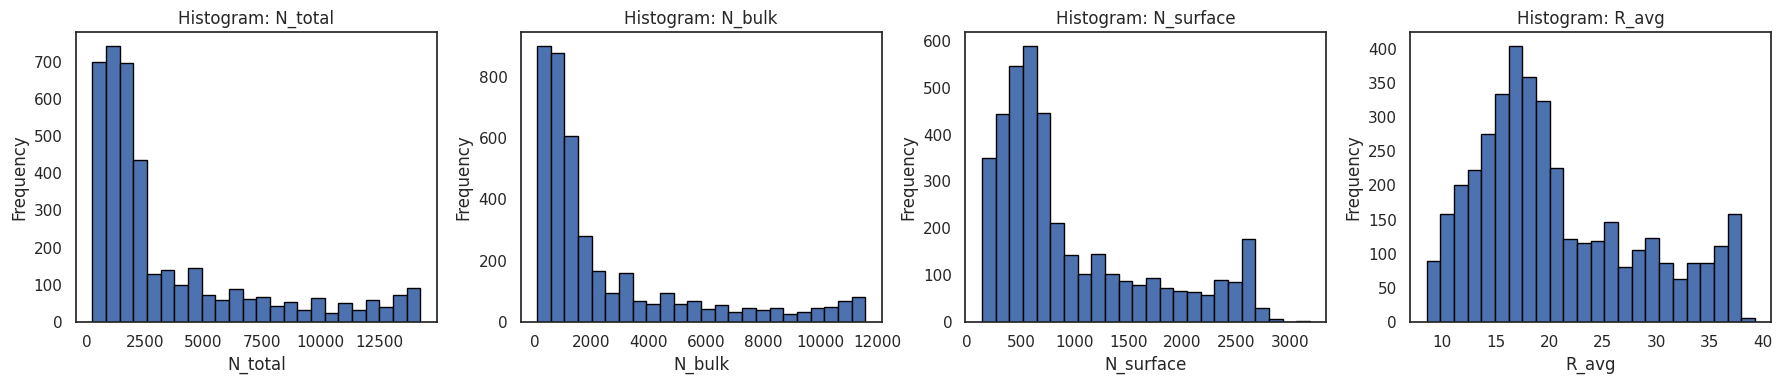

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
for ax, col in zip(axes, four_cols):
    ax.hist(four_df[col].dropna(), bins=24, edgecolor='black')
    ax.set_title(f'Histogram: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
pp_data = df_filtered.select_dtypes(include=[np.number])
if not pp_data.empty:
    sns.pairplot(pp_data, diag_kind="hist")
    plt.show()
else:
    print("No numeric columns remain in df_filtered to pairplot.")

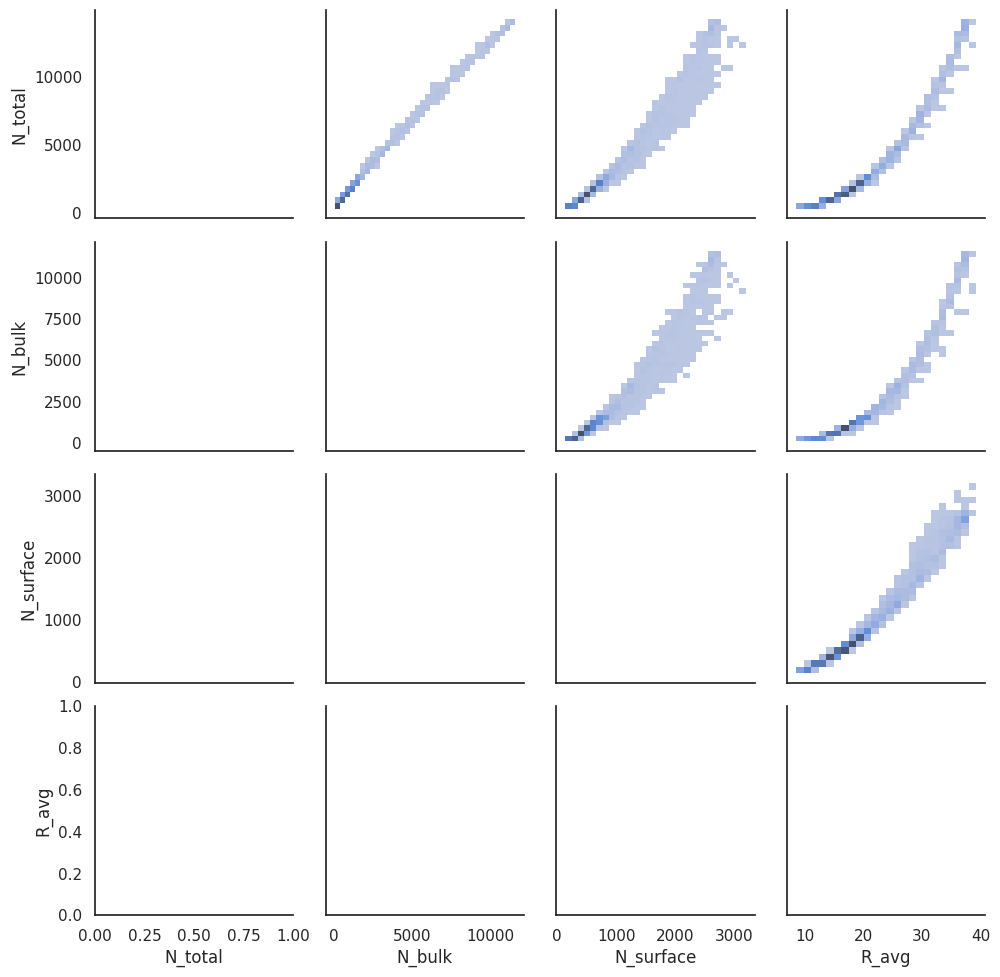

In [22]:
new_df = four_df.copy()

g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)

In [23]:
def diag_hist_kde(x, color=None, **kwargs):
    sns.histplot(x, stat="density", kde=True, edgecolor=None, **kwargs)

g.map_diag(diag_hist_kde)

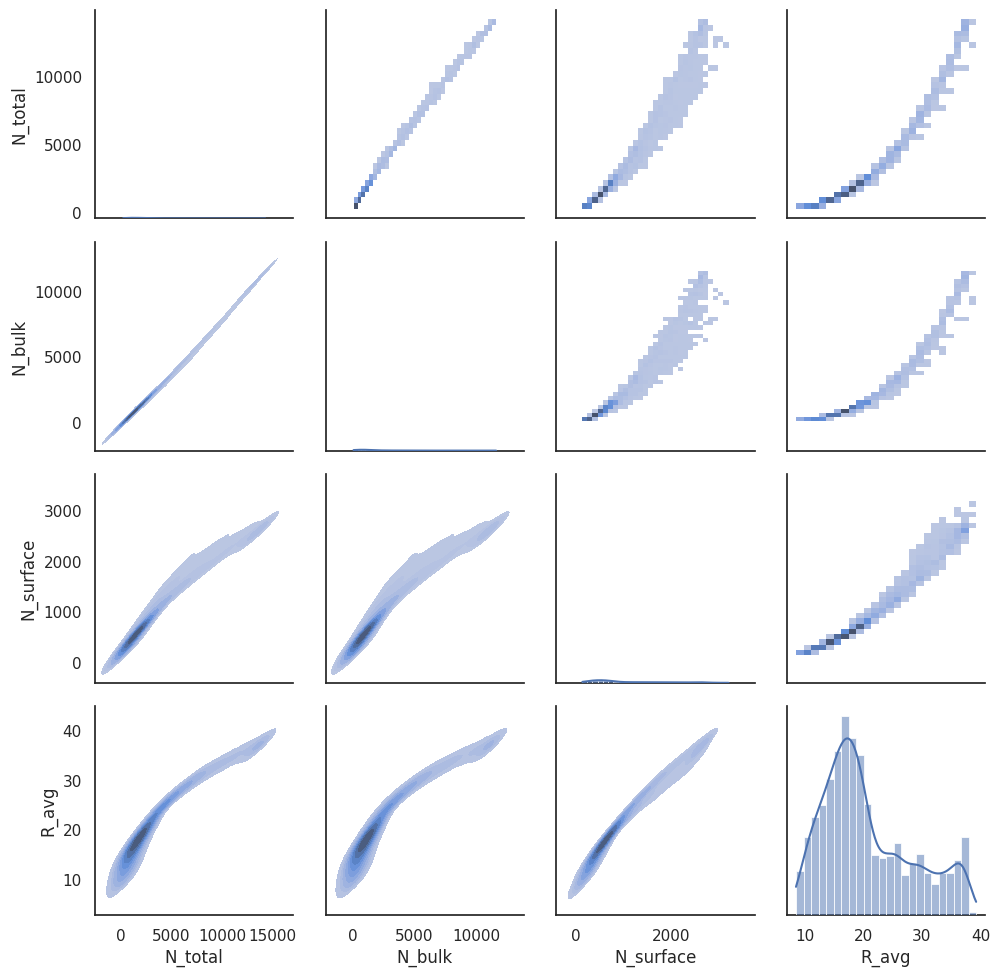

In [24]:
g.map_lower(sns.kdeplot, fill=True, thresh=0.05)
plt.show()